In [5]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:52456 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 12.74 GB


In [ ]:
# df = dd.read_csv("/content/drive/MyDrive/gl/CAPSTONE/Shared_folder_final/yellow_car_data_2018/*.csv")
df = dd.read_csv(r"E:\TLC_csvs_pro\yellow_car_data_2018\*.csv")

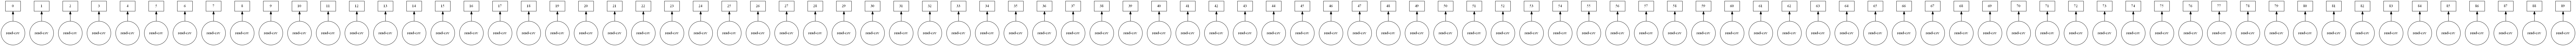

In [ ]:
df.visualize()

In [ ]:
df.columns

Index(['date', 'time_code', 'pulid', 'dolid', 'duration', 'weekday',
       'distance', 'totalSnow_cm', 'FeelsLikeC', 'precipMM'],
      dtype='object')

### Data Cleaning

#### 1. Analysis of Trip Distance

Box plot showing distribution of trip distance

Text(0.5, 0, 'distance(miles)')

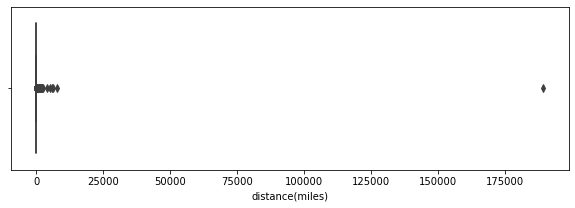

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df.distance)
plt.xlabel("distance(miles)", size=10)

In [ ]:
df['distance'].describe(percentiles=[.98,.99,.995,.997,.998,.999,.9995,.9998,.9999,.99995,.999995]).compute()

count       9.875588e+07
mean        2.956451e+00
std         1.950046e+01
min         1.000000e-02
50%         1.740000e+00
98%         1.798000e+01
99%         1.952000e+01
99.5%       2.108000e+01
99.7%       2.210000e+01
99.8%       2.388892e+01
99.9%       2.807000e+01
99.95%      3.072169e+01
99.98%      3.806033e+01
99.99%      4.480830e+01
99.995%     5.371641e+01
99.9995%    1.507878e+02
max         1.894838e+05
Name: distance, dtype: float64

The trip distance rises sharply after 99.995 percentile values. Removing those values 

In [ ]:
df_1 = df[df['distance'] < 60]

In [ ]:
olen = df.shape[0].compute()
nulen = df_1.shape[0].compute()
print('*** Number of rows dropped = {} ***'.format(olen - nulen))

*** Number of rows dropped = 2006 ***


Box plot after removing outliers

Text(0.5, 0, 'distance(miles)')

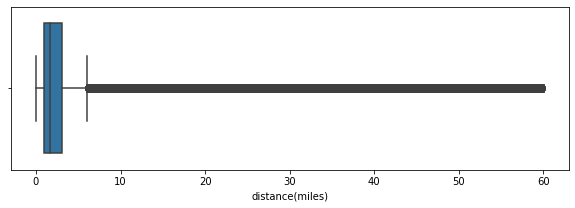

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_1.distance)
plt.xlabel("distance(miles)", size=10)

Distribution of trip distance after outlier removal

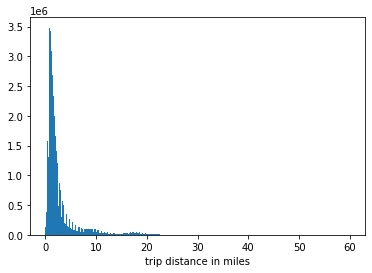

In [ ]:
_=plt.hist(df_1.distance.compute(), bins=1000)
_=plt.xlabel("trip distance in miles", size=10)

#### 2. Analysis of fare amount

Box plot showing distribution of fare amount

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_1.fare_amount)
plt.xlabel("fare_amount", size=10)

In [ ]:
df_1['fare_amount'].describe(percentiles=[.98,.99,.995,.997,.998,.999,.9995,.9998,.9999,.99995,.999995]).compute()

In [ ]:
# Sudden increase in fare amount after 99.995 percent values 

In [ ]:
df_2 = df_1[df_1['fare_amount'] < 300]

In [ ]:
olen = df_1.shape[0].compute()
nulen = df_2.shape[0].compute()
print('*** Number of rows dropped = {} ***'.format(olen - nulen))

Box plot after removing outliers

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_2.trip_distance)
plt.xlabel("fare amount", size=10)

#### 2. Analysis of trip duration

Box plot showing distribution of trip distance

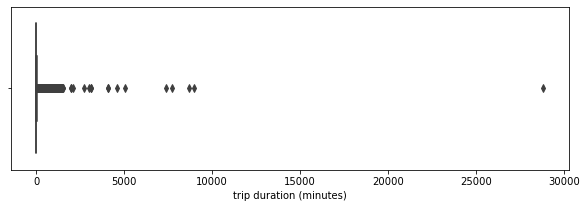

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_1.duration)
_=plt.xlabel("trip duration (minutes)", size=10)

In [ ]:
df_1['duration'].describe(percentiles=[.98,.99,.995,.997,.998,.999,.9995,.9998,.9999,.99995,.999995]).compute()

count       9.875388e+07
mean        1.755866e+01
std         6.671288e+01
min         1.666667e-02
50%         1.283333e+01
98%         6.103333e+01
99%         6.846667e+01
99.5%       8.288483e+01
99.7%       1.210142e+02
99.8%       1.405191e+03
99.9%       1.432433e+03
99.95%      1.436981e+03
99.98%      1.438433e+03
99.99%      1.438869e+03
99.995%     1.439151e+03
99.9995%    1.439867e+03
max         2.883697e+04
Name: duration, dtype: float64

In [ ]:
df_2 = df_1[df_1['duration'] < 720]

In [ ]:
olen = df_1.shape[0].compute()
nulen = df_2.shape[0].compute()
print('*** Number of rows dropped = {} ***'.format(olen - nulen))

*** Number of rows dropped = 218657 ***


Box plot after removing outliers

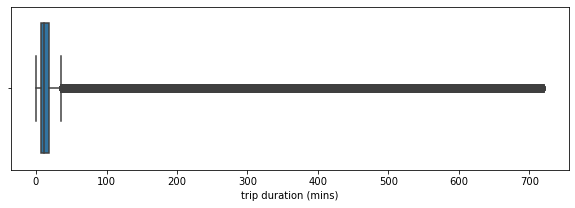

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_2.duration)
_=plt.xlabel("trip duration (mins)", size=10)

Distribution of trip duration 

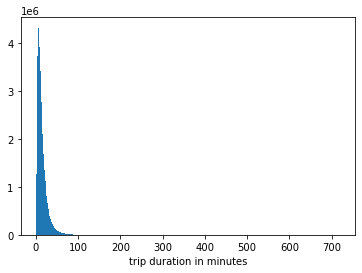

In [ ]:
_=plt.hist(df_2.duration.compute(), bins=1000)
_=plt.xlabel("trip duration in minutes", size=10)

#### Distribution of pickup locations

In [ ]:
pu = df_2.groupby('pulid')
df_pu = pu.count().compute()

Text(0.5, 0, 'pickup location id')

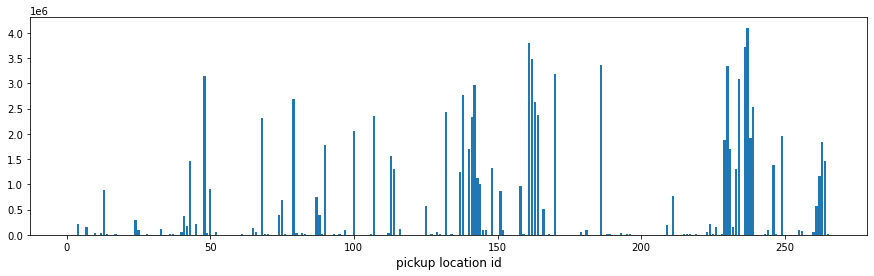

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(df_pu.index, df_pu.iloc[:,1])
plt.xlabel("pickup location id", size=12)

In [ ]:
# Add month column to existing dataframe

In [ ]:
df_2['date'] = df['date'].astype('datetime64[ns]')

In [ ]:
df_2['month'] = df_2.date.dt.month

In [ ]:
df_2.dtypes

date            datetime64[ns]
time_code                int64
pulid                    int64
dolid                    int64
duration               float64
weekday                  int64
distance               float64
totalSnow_cm           float64
FeelsLikeC               int64
precipMM               float64
month                    int64
dtype: object

In [ ]:
df_2.to_csv(r"E:\Drive\gl\CAPSTONE\final\cleaned_data_2018\export-*.csv", index=False, single_file=False)

In [ ]:
df_grpd = df_2.groupby(['pulid','weekday','month','time_code','totalSnow_cm','FeelsLikeC','precipMM'])

In [ ]:
df_grpd

In [ ]:
# Final dataframe
df_out = df_grpd.size().to_frame(name = 'count').reset_index() 
df_out.head()

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
0,1,0,1,7,0.0,-21,0.0,1
1,1,0,1,13,0.0,-22,0.0,1
2,1,0,1,16,0.0,-21,0.0,1
3,1,0,1,18,0.0,-20,0.0,2
4,1,0,1,24,0.0,-18,0.0,1


In [ ]:
df_out.to_csv(r"E:\Drive\gl\CAPSTONE\final\2018_cleaned_ww_*.csv", index=False)

['E:/Drive/gl/CAPSTONE/final/2018_cleaned_ww_0.csv']

In [ ]:
# df_out = pd.read_csv(r'E:\Drive\gl\CAPSTONE\final\2018_cleaned_ww_0.csv')

In [ ]:
df_t = df_out.groupby(['month', 'time_code'])['count'].count()

In [ ]:
df_t = df_t.compute()

In [ ]:
df_t.head()

month  time_code
1      1            2906
       2            2860
       3            2881
       4            2704
       5            2736
Name: count, dtype: int64

Text(0, 0.5, 'Number of pickups')

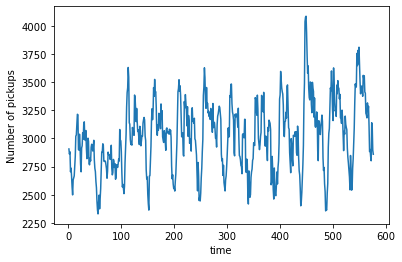

In [ ]:
plt.plot(range(1,577),df_t)
plt.xlabel('time')
plt.ylabel('Number of pickups')

### Prediction Models

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

In [ ]:
# ml_df = pd.read_csv(r"E:\Drive\gl\CAPSTONE\final\2018_cleaned_ww_0.csv")
# ml_df = pd.read_csv("/content/drive/MyDrive/gl/CAPSTONE/Shared_folder_final/2018_cleaned_ww_0.csv")
ml_df = pd.read_csv("/content/drive/MyDrive/MachinLearning/2018_fulldata_with-weather_cleaned.csv")

In [ ]:
ml_df.head()

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
0,1,0,1,7,0.0,-21,0.0,1
1,1,0,1,13,0.0,-22,0.0,1
2,1,0,1,16,0.0,-21,0.0,1
3,1,0,1,18,0.0,-20,0.0,2
4,1,0,1,24,0.0,-18,0.0,1


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
X = ml_df.drop('count', axis=1)
y = ml_df['count']

In [ ]:
#split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Load test dataset for 2019
# df_19 = pd.read_csv(r'E:\Drive\gl\CAPSTONE\final\2019_cleaned_ww_0.csv')
df_19 = pd.read_csv('/content/drive/MyDrive/MachinLearning/2019_cleaned_ww_0.csv')

In [ ]:
test_19 = df_19.sample(frac=0.2)
X_test_19 = test_19.drop('count', axis=1)
y_test_19 = test_19['count']

In [ ]:
rmseTest = []
rmseTrain = []

r2Test = []
r2Train = []

r219 = []
rmse19 = []

names = []

## Iteration 1 
### Taking all weekdays into consideration 

#### 1. Linear Regression


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
lr_reg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(lr_reg,parameters, cv=None)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


##### Prediction on training data

In [ ]:
lr = LinearRegression(fit_intercept= True,copy_X = True, normalize = True )

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)

mse_lr_train = mean_squared_error(y_train, y_pred_train)
print('RMSE on training data:', np.sqrt(mse_lr_train))

r2_train = r2_score(y_train, y_pred_train)
print("R squared for Linear Regression on training data is: ", r2_train)

print('Coefficient of determination: %.4f on training data'% r2_score(y_train, y_pred_train))

RMSE on training data: 91.80342119938163
R squared for Linear Regression on training data is:  0.06445539929718824
Coefficient of determination: 0.0645 on training data


##### Prediction on test data

In [ ]:
y_pred_test = lr.predict(X_test)

mse_lr_test = mean_squared_error(y_test, y_pred_test)
print('RMSE on test data:', np.sqrt(mse_lr_test))

r2_test = r2_score(y_test, y_pred_test)
print("R squared for Linear Regression on test data is: ", r2_test)

print('Coefficient of determination: %.4f on test data'% r2_score(y_test, y_pred_test))

RMSE on test data: 91.96994622071395
R squared for Linear Regression on test data is:  0.06509248117689803
Coefficient of determination: 0.0651 on test data


##### Prediction on 2019 data

In [ ]:
y_pred_19 = lr.predict(X_test_19)

In [ ]:
mse_lr_test_19 = mean_squared_error(y_test_19, y_pred_19)
print('RMSE on test data:', np.sqrt(mse_lr_test))

r2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared for Linear Regression on test data is: ", r2_test)

print('Coefficient of determination: %.4f on test data'% r2_score(y_test_19, y_pred_19))

RMSE on test data: 91.96994622071395
R squared for Linear Regression on test data is:  0.06509248117689803
Coefficient of determination: 0.0412 on test data


In [ ]:
rmseTrain.append(np.sqrt(mse_lr_train))
rmseTest.append(np.sqrt(mse_lr_test))

r2Test.append(r2_test)
r2Train.append(r2_train)

r219.append(r2_test_19)
rmse19.append(np.sqrt(mse_lr_test))

names.append('LR')

### 1. Random Forest regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
import random

In [ ]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

# Try different numbers of n_estimators
estimators = [50, 75, 100]
scores = []
scoresOfEstimation = []

for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    scoresOfEstimation.append(n)

No handles with labels found to put in legend.


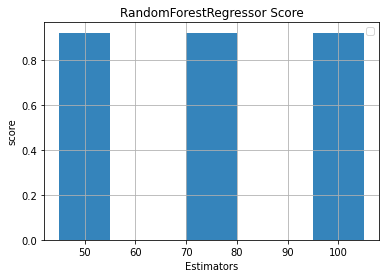

In [ ]:
plt.bar(scoresOfEstimation,scores,10,alpha=.9)
plt.ylabel('score')
plt.xlabel('Estimators')
plt.title('RandomForestRegressor Score')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0) 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

##### Prediction on training data

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("RMSE for Random forest regression on training data is: ", rmse_train)

RMSE for Random forest regression on training data is:  10.116826239853529


In [ ]:
r2_train = r2_score(y_train, y_pred_train)
print("R squared for Random forest regression on training data is: ", r2_train)

R squared for Random forest regression on training data is:  0.988638508546562


##### Prediction on test data

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print("RMSE for Random forest regression on test data is: ", rmse_test)

RMSE for Random forest regression on test data is:  26.567718394634987


In [ ]:
r2_test = r2_score(y_test, y_pred)
print("R squared for Random forest regression on test data is: ", r2_test)

R squared for Random forest regression on test data is:  0.9219837078253066


##### Prediction on 2019 data

In [ ]:
y_pred_19 = regressor.predict(X_test_19)

In [ ]:
mse_test = mean_squared_error(y_test_19, y_pred_19)
rmse_test_19 = np.sqrt(mse_test)
print("RMSE for Random forest regression on 2019 data is: ", rmse_test_19)

RMSE for Random forest regression on 2019 data is:  39.87437723331487


In [ ]:
r2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared for Random forest regression on 2019 data is: ", r2_test_19)

R squared for Random forest regression on 2019 data is:  0.7512854058387293


In [ ]:
rmseTrain.append(rmse_train)
rmseTest.append(rmse_test)

r2Train.append(r2_train)
r2Test.append(r2_test)


r219.append(r2_test_19)
rmse19.append(rmse_test_19)

names.append('RFR')

### 2. XGBoost regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 69.2min finished


0.8634344280093498
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
XGBModel = XGBRegressor(colsample_bytree=0.7, learning_rate = 0.07, max_depth = 7, 
                        min_child_weight = 4, n_estimators = 500, nthread = 4,
                        objective ='reg:linear', silent = 1, subsample = 0.7)
XGBModel.fit(X_train,y_train , verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

##### Prediction on training data

In [ ]:
XGBpredict_train = XGBModel.predict(X_train)
MAE = mean_absolute_error(y_train , XGBpredict_train)
print('XGBoost training MAE = ',MAE)

XGBoost training MAE =  17.47124773268577


In [ ]:
XGBmse_train = mean_squared_error(y_train, XGBpredict_train)
XGBrmse_train = np.sqrt(XGBmse_train)
print("Root-mean-squared-error for XGB regression on training data is: ", XGBrmse_train)

Root-mean-squared-error for XGB regression on training data is:  34.77244165571624


In [ ]:
XGBr2_train = r2_score(y_train, XGBpredict_train)
print("R squared for XGB regression on training data is: ", XGBr2_train)

R squared for XGB regression on training data is:  0.8657800296539486


##### Prediction on test data

In [ ]:
XGBpredict_test = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredict_test)
print('XGBoost test MAE = ',MAE)

XGBoost test MAE =  17.597058030810114


In [ ]:
XGBmse_test = mean_squared_error(y_test, XGBpredict_test)
XGBrmse_test = np.sqrt(XGBmse_test)
print("Root-mean-squared-error for XGB regression on test data is: ", XGBrmse_test)

Root-mean-squared-error for XGB regression on test data is:  34.97289571644468


In [ ]:
XGBr2_test = r2_score(y_test, XGBpredict_test)
print("R squared for  XGB regression on test data is: ", XGBr2_test)

R squared for  XGB regression on test data is:  0.8648114302896333


##### Prediction on 2019 data

In [ ]:
y_pred_19 = XGBModel.predict(X_test_19)

In [ ]:
mse_test_19 = mean_squared_error(y_test_19, y_pred_19)
rmse_test_19 = np.sqrt(mse_test_19)
print("RMSE for XGB regression on 2019 data is: ", rmse_test_19)

RMSE for XGB regression on 2019 data is:  36.03724995161547


In [ ]:
r2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared for XGB regression on test data is: ", r2_test_19)

R squared for XGB regression on test data is:  0.7968500464839413


In [ ]:
rmseTrain.append(XGBrmse_train)
rmseTest.append(XGBrmse_test)

r2Train.append(XGBr2_train)
r2Test.append(XGBr2_test)


r219.append(r2_test_19)
rmse19.append(rmse_test_19)

names.append('XGB')

### 3. Neural network regression

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/50
34784/34785 [============================>.] - ETA: 0s - loss: 52.9658 - mean_absolute_error: 52.9658
Epoch 00001: val_loss improved from inf to 52.43839, saving model to Weights-001--52.43839.hdf5
34785/34785 [==============================] - 87s 2ms/step - loss: 52.9662 - mean_absolute_error: 52.9662 - val_loss: 52.4384 - val_mean_absolute_error: 52.4384
Epoch 2/50
34768/34785 [============================>.] - ETA: 0s - loss: 52.4460 - mean_absolute_error: 52.4460
Epoch 00002: val_loss improved from 52.43839 to 52.17031, saving model to Weights-002--52.17031.hdf5
34785/34785 [==============================] - 87s 3ms/step - loss: 52.4458 - mean_absolute_error: 52.4458 - val_loss: 52.1703 - val_mean_absolute_error: 52.1703
Epoch 3/50
34781/34785 [============================>.] - ETA: 0s - loss: 51.5043 - mean_absolute_error: 51.5043
Epoch 00003: val_loss did not improve from 52.17031
34785/34785 [==============================] - 88s 3ms/step - loss: 51.5048 - mean_absol

In [ ]:
# Load weights file of the best model :
wights_file = 'Weights-033--34.69875.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

##### Prediction on training *data*

In [ ]:
NNpredict_train = NN_model.predict(X_train)

In [ ]:
NN_train_MAE = mean_absolute_error(y_train , NNpredict_train)
print('Test MAE = ',NN_train_MAE)

Test MAE =  34.763973412864516


In [ ]:
NNmse_train = mean_squared_error(y_train , NNpredict_train)
NNrmse_train = np.sqrt(NNmse_train)
print("RMSE on train data: ", NNrmse_train)

RMSE on train data:  70.03144113551829


In [ ]:
NN_r2_train = r2_score(y_train , NNpredict_train)
print("R squared on train data: ", NN_r2_train)

R squared on train data:  0.4555814789975071


##### Prediction on test *data*

In [ ]:
NNpredict_test = NN_model.predict(X_test)

In [ ]:
NN_MAE = mean_absolute_error(y_test , NNpredict_test)
print('Test MAE = ',NN_MAE)

Test MAE =  34.798113343275276


In [ ]:
NNmse_test = mean_squared_error(y_test, NNpredict_test)
NNrmse_test = np.sqrt(NNmse_test)
print("RMSE on test data: ", NNrmse_test)

RMSE on test data:  70.12530137855737


In [ ]:
NN_r2_test = r2_score(y_test, NNpredict_test)
print("R squared on test data: ", NN_r2_test)

R squared on test data:  0.45646655943408476


##### Prediction on 2019 data

In [ ]:
NNpredict_test_19 = NN_model.predict(X_test_19)

In [ ]:
NN_MAE_19 = mean_absolute_error(y_test_19 , NNpredict_test_19)
print('Test MAE = ',NN_MAE_19)

Test MAE =  30.365482785635468


In [ ]:
NNmse_test_19 = mean_squared_error(y_test_19 , NNpredict_test_19)
NNrmse_test_19 = np.sqrt(NNmse_test_19)
print("RMSE on 2019 data: ", NNrmse_test_19)

RMSE on 2019 data:  59.53838630092551


In [ ]:
NN_r2_test_19 = r2_score(y_test_19 , NNpredict_test_19)
print("R squared on test data: ", NN_r2_test_19)

R squared on test data:  0.4454923240234385


In [ ]:
rmseTrain.append(NNrmse_train)
rmseTest.append(NNrmse_test)

r2Train.append(NN_r2_train)
r2Test.append(NN_r2_test)


r219.append(NN_r2_test_19)
rmse19.append(NNrmse_test_19)

names.append('NN')

### 4. Decision Tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtm = DecisionTreeRegressor()

param_grid = {"criterion": ["mse", "mae"],
              "max_depth": [3, 9, 13],
              "min_samples_leaf": [10, 30, 50],
              "max_leaf_nodes": [10, 20, 30],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

In [ ]:
regressor = DecisionTreeRegressor(max_depth=13, random_state=1, min_samples_leaf=10)


In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

###### Prediction on *training data*

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
MAE_train = mean_absolute_error(y_train , y_pred_train)
print('Mean absolute error for training data = ', MAE_train)

DTmse_train = mean_squared_error(y_train, y_pred_train)
DTrmse_train = np.sqrt(DTmse_train)
print("RMSE for training data is: ", DTrmse_train)

DTr2_train = r2_score(y_train, y_pred_train)
print("R squared on training data is: ", DTr2_train)

Mean absolute error for training data =  14.62356600674948
RMSE for training data is:  36.41546470490062
R squared on training data is:  0.8527963844039365


###### Prediction on *test data*

In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
MAE_test = mean_absolute_error(y_test , y_pred_test)
print('Mean absolute error for test data = ', MAE_test)

DTmse_test = mean_squared_error(y_test, y_pred_test)
DTrmse_test = np.sqrt(DTmse_test)
print("RMSE for test data is: ", DTrmse_test)

DTr2_test = r2_score(y_test, y_pred_test)
print("R squared on test data is: ", DTr2_test)

Mean absolute error for test data =  14.89324024270275
RMSE for test data is:  36.92971081950615
R squared on test data is:  0.8492599686521307


###### Prediction on *2019 data*

In [ ]:
y_pred_19 = regressor.predict(X_test_19)

In [ ]:
MAE_19 = mean_absolute_error(y_test_19 , y_pred_19)
print('Mean absolute error for 2019 data = ', MAE_19)

DTmse_test_19 = mean_squared_error(y_test_19, y_pred_19)
DTrmse_test_19 = np.sqrt(DTmse_test_19)
print("RMSE for 2019 data is: ", DTrmse_test_19)

DTr2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared on 2019 data is: ", DTr2_test_19)

Mean absolute error for 2019 data =  17.491173666424775
RMSE for 2019 data is:  37.32670217813112
R squared on 2019 data is:  0.782052101154683


In [ ]:
rmseTrain.append(DTrmse_train)
rmseTest.append(DTrmse_test)

r2Train.append(DTr2_train)
r2Test.append(DTr2_test)

r219.append(DTr2_test_19)
rmse19.append(DTrmse_test_19)

names.append('DT')

### Compare Models

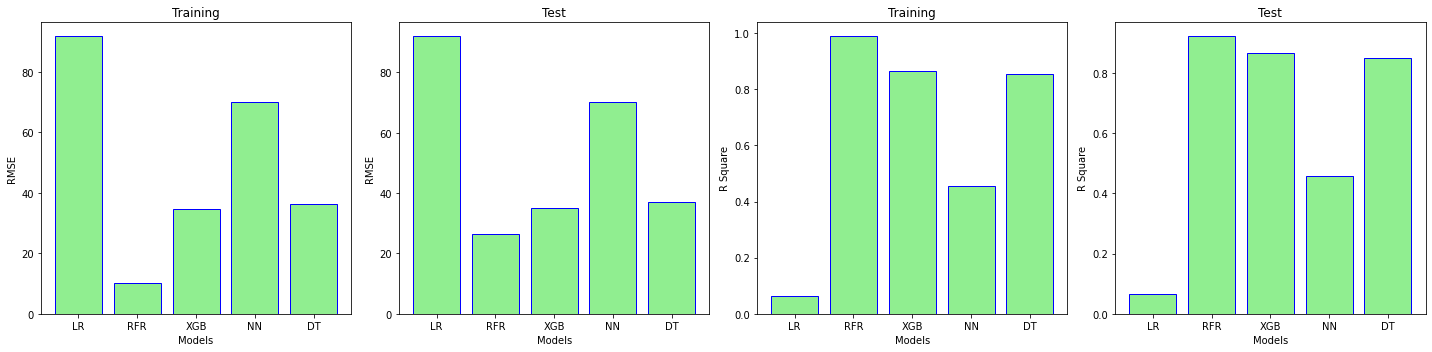

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (20,5)) # 1st width, 2nd height

ax1.bar(names,rmseTrain, color= 'lightgreen', edgecolor = 'b')
ax1.set_title('Training')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')

ax2.bar(names,rmseTest, color= 'lightgreen', edgecolor = 'b')
ax2.set_title('Test')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')

ax3.bar(names,r2Train, color= 'lightgreen', edgecolor = 'b')
ax3.set_title('Training')
ax3.set_xlabel('Models')
ax3.set_ylabel('R Square')

ax4.bar(names,r2Test, color= 'lightgreen', edgecolor = 'b')
ax4.set_title('Test')
ax4.set_xlabel('Models')
ax4.set_ylabel('R Square')

fig.tight_layout()

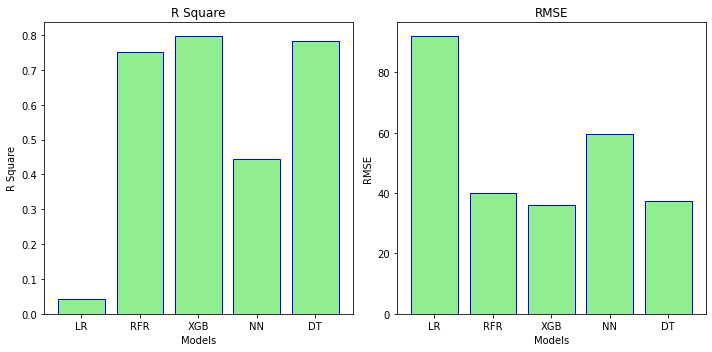

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10,5)) # 1st width, 2nd height

ax1.bar(names,r219, color= 'lightgreen', edgecolor = 'b')
ax1.set_title('R Square')
ax1.set_xlabel('Models')
ax1.set_ylabel('R Square')

ax2.bar(names,rmse19, color= 'lightgreen', edgecolor = 'b')
ax2.set_title('RMSE')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')

fig.tight_layout()

## Iteration 2 (Day = 3)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

day = 3

ml_df_o = pd.read_csv("/content/drive/MyDrive/MachinLearning/2018_fulldata_with-weather_cleaned.csv")
ml_df = ml_df_o[ml_df_o['weekday'] == day]

X = ml_df.drop('count', axis=1)
y = ml_df['count']

#split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

df_19_o = pd.read_csv('/content/drive/MyDrive/MachinLearning/2019_cleaned_ww_0.csv')
df_19 = df_19_o[df_19_o['weekday'] == day]

test_19 = df_19.sample(frac=0.2)
X_test_19 = test_19.drop('count', axis=1)
y_test_19 = test_19['count']

rmseTest = []
rmseTrain = []

r2Test = []
r2Train = []

r219 = []
rmse19 = []

names = []

In [ ]:
ml_df

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
21,1,3,1,7,0.0,-10,0.0,2
22,1,3,1,31,0.0,-12,0.2,1
23,1,3,1,33,0.0,-12,0.1,1
24,1,3,1,39,0.0,-13,0.0,1
40,3,3,1,3,0.0,-10,0.0,1
...,...,...,...,...,...,...,...,...
1739177,265,3,9,44,0.0,19,1.1,2
1739178,265,3,9,45,0.0,19,0.5,3
1739179,265,3,9,46,0.0,19,0.5,3
1739180,265,3,9,47,0.0,18,0.0,1


In [ ]:
df_19

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
10,1,3,1,27,0.0,2,0.0,1
11,1,3,1,28,0.0,2,0.0,1
31,3,3,1,19,0.0,-1,0.1,1
32,3,3,1,26,0.0,1,0.0,1
33,3,3,1,28,0.0,2,0.0,1
...,...,...,...,...,...,...,...,...
1761019,265,3,9,9,0.0,22,0.0,1
1761020,265,3,9,16,0.0,14,0.0,1
1761021,265,3,9,29,0.0,25,0.0,1
1761022,265,3,9,32,0.0,24,0.0,1


#### 1. Linear Regression


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
lr_reg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(lr_reg,parameters, cv=None)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}


##### Prediction on training data

In [ ]:
lr = LinearRegression(fit_intercept= True,copy_X = True, normalize = True )

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)

mse_lr_train = mean_squared_error(y_train, y_pred_train)
print('RMSE on training data:', np.sqrt(mse_lr_train))

r2_train = r2_score(y_train, y_pred_train)
print("R squared for Linear Regression on training data is: ", r2_train)

print('Coefficient of determination: %.4f on training data'% r2_score(y_train, y_pred_train))

RMSE on training data: 97.8433839046754
R squared for Linear Regression on training data is:  0.07740603330965345
Coefficient of determination: 0.0774 on training data


##### Prediction on test data

In [ ]:
y_pred_test = lr.predict(X_test)

mse_lr_test = mean_squared_error(y_test, y_pred_test)
print('RMSE on test data:', np.sqrt(mse_lr_test))

r2_test = r2_score(y_test, y_pred_test)
print("R squared for Linear Regression on test data is: ", r2_test)

print('Coefficient of determination: %.4f on test data'% r2_score(y_test, y_pred_test))

RMSE on test data: 97.7285895716291
R squared for Linear Regression on test data is:  0.07702927386171465
Coefficient of determination: 0.0770 on test data


##### Prediction on 2019 data

In [ ]:
y_pred_19 = lr.predict(X_test_19)

In [ ]:
mse_lr_test_19 = mean_squared_error(y_test_19, y_pred_19)
print('RMSE on test data:', np.sqrt(mse_lr_test))

r2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared for Linear Regression on test data is: ", r2_test)

print('Coefficient of determination: %.4f on test data'% r2_score(y_test_19, y_pred_19))

RMSE on test data: 97.7285895716291
R squared for Linear Regression on test data is:  0.07702927386171465
Coefficient of determination: 0.0560 on test data


In [ ]:
rmseTrain.append(np.sqrt(mse_lr_train))
rmseTest.append(np.sqrt(mse_lr_test))

r2Test.append(r2_test)
r2Train.append(r2_train)

r219.append(r2_test_19)
rmse19.append(np.sqrt(mse_lr_test))

names.append('LR')

### 1. Random Forest regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
import random

In [ ]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

# Try different numbers of n_estimators - this will take a minute or so
estimators = [50, 75, 100]
scores = []
scoresOfEstimation = []

for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    scoresOfEstimation.append(n)

No handles with labels found to put in legend.


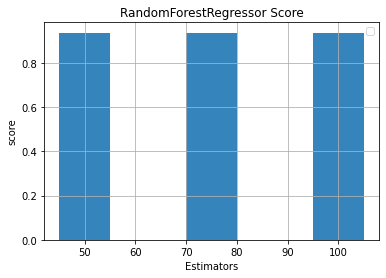

In [ ]:
plt.bar(scoresOfEstimation,scores,10,alpha=.9)
plt.ylabel('score')
plt.xlabel('Estimators')
plt.title('RandomForestRegressor Score')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0) 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

##### Prediction on training data

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("RMSE for Random forest regression on training data is: ", rmse_train)

RMSE for Random forest regression on training data is:  10.003020565438028


In [ ]:
r2_train = r2_score(y_train, y_pred_train)
print("R squared for Random forest regression on training data is: ", r2_train)

R squared for Random forest regression on training data is:  0.9903570480008943


##### Prediction on test data

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print("RMSE for Random forest regression on test data is: ", rmse_test)

RMSE for Random forest regression on test data is:  26.083657684219958


In [ ]:
r2_test = r2_score(y_test, y_pred)
print("R squared for Random forest regression on test data is: ", r2_test)

R squared for Random forest regression on test data is:  0.9342521359240187


##### Prediction on 2019 data

In [ ]:
y_pred_19 = regressor.predict(X_test_19)

In [ ]:
mse_test = mean_squared_error(y_test_19, y_pred_19)
rmse_test_19 = np.sqrt(mse_test)
print("RMSE for Random forest regression on 2019 data is: ", rmse_test_19)

RMSE for Random forest regression on 2019 data is:  45.377557882166776


In [ ]:
r2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared for Random forest regression on 2019 data is: ", r2_test_19)

R squared for Random forest regression on 2019 data is:  0.717471532489513


In [ ]:
rmseTrain.append(rmse_train)
rmseTest.append(rmse_test)

r2Train.append(r2_train)
r2Test.append(r2_test)


r219.append(r2_test_19)
rmse19.append(rmse_test_19)

names.append('RFR')

### 2. XGBoost regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  7.7min finished


0.9036141223931082
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
XGBModel = XGBRegressor(colsample_bytree=0.7, learning_rate = 0.07, max_depth = 7, 
                        min_child_weight = 4, n_estimators = 500, nthread = 4,
                        objective ='reg:linear', silent = 1, subsample = 0.7)
XGBModel.fit(X_train,y_train , verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

##### Prediction on training data

In [ ]:
XGBpredict_train = XGBModel.predict(X_train)
MAE = mean_absolute_error(y_train , XGBpredict_train)
print('XGBoost training MAE = ',MAE)

XGBoost training MAE =  15.15510695522574


In [ ]:
XGBmse_train = mean_squared_error(y_train, XGBpredict_train)
XGBrmse_train = np.sqrt(XGBmse_train)
print("Root-mean-squared-error for XGB regression on training data is: ", XGBrmse_train)

Root-mean-squared-error for XGB regression on training data is:  29.88897034468239


In [ ]:
XGBr2_train = r2_score(y_train, XGBpredict_train)
print("R squared for XGB regression on training data is: ", XGBr2_train)

R squared for XGB regression on training data is:  0.913906653419452


##### Prediction on test data

In [ ]:
XGBpredict_test = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredict_test)
print('XGBoost test MAE = ',MAE)

XGBoost test MAE =  15.544730312023223


In [ ]:
XGBmse_test = mean_squared_error(y_test, XGBpredict_test)
XGBrmse_test = np.sqrt(XGBmse_test)
print("Root-mean-squared-error for XGB regression on test data is: ", XGBrmse_test)

Root-mean-squared-error for XGB regression on test data is:  30.846285637612393


In [ ]:
XGBr2_test = r2_score(y_test, XGBpredict_test)
print("R squared for  XGB regression on test data is: ", XGBr2_test)

R squared for  XGB regression on test data is:  0.9080502788846456


##### Prediction on 2019 data

In [ ]:
y_pred_19 = XGBModel.predict(X_test_19)

In [ ]:
mse_test_19 = mean_squared_error(y_test_19, y_pred_19)
rmse_test_19 = np.sqrt(mse_test_19)
print("RMSE for XGB regression on 2019 data is: ", rmse_test_19)

RMSE for XGB regression on 2019 data is:  38.937892407846185


In [ ]:
r2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared for XGB regression on test data is: ", r2_test_19)

R squared for XGB regression on test data is:  0.79197053296136


In [ ]:
rmseTrain.append(XGBrmse_train)
rmseTest.append(XGBrmse_test)

r2Train.append(XGBr2_train)
r2Test.append(XGBr2_test)


r219.append(r2_test_19)
rmse19.append(rmse_test_19)

names.append('XGB')

### 3. Neural network regression

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/30
4965/4966 [============================>.] - ETA: 0s - loss: 57.5174 - mean_absolute_error: 57.5174
Epoch 00001: val_loss improved from inf to 56.97952, saving model to Weights-001--56.97952.hdf5
4966/4966 [==============================] - 13s 3ms/step - loss: 57.5233 - mean_absolute_error: 57.5233 - val_loss: 56.9795 - val_mean_absolute_error: 56.9795
Epoch 2/30
4949/4966 [============================>.] - ETA: 0s - loss: 57.2667 - mean_absolute_error: 57.2667
Epoch 00002: val_loss did not improve from 56.97952
4966/4966 [==============================] - 13s 3ms/step - loss: 57.2849 - mean_absolute_error: 57.2849 - val_loss: 57.4892 - val_mean_absolute_error: 57.4892
Epoch 3/30
4950/4966 [============================>.] - ETA: 0s - loss: 57.1341 - mean_absolute_error: 57.1341
Epoch 00003: val_loss improved from 56.97952 to 56.56938, saving model to Weights-003--56.56938.hdf5
4966/4966 [==============================] - 13s 3ms/step - loss: 57.1427 - mean_absolute_error: 5

In [ ]:
# Load weights file of the best model :
wights_file = 'Weights-020--45.36434.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

##### Prediction on training *data*

In [ ]:
NNpredict_train = NN_model.predict(X_train)

In [ ]:
NN_train_MAE = mean_absolute_error(y_train , NNpredict_train)
print('Test MAE = ',NN_train_MAE)

Test MAE =  45.65077384918015


In [ ]:
NNmse_train = mean_squared_error(y_train , NNpredict_train)
NNrmse_train = np.sqrt(NNmse_train)
print("RMSE on train data: ", NNrmse_train)

RMSE on train data:  85.16258328249648


In [ ]:
NN_r2_train = r2_score(y_train , NNpredict_train)
print("R squared on train data: ", NN_r2_train)

R squared on train data:  0.30105124623115154


##### Prediction on test *data*

In [ ]:
NNpredict_test = NN_model.predict(X_test)

In [ ]:
NN_MAE = mean_absolute_error(y_test , NNpredict_test)
print('Test MAE = ',NN_MAE)

Test MAE =  45.743558442834846


In [ ]:
NNmse_test = mean_squared_error(y_test, NNpredict_test)
NNrmse_test = np.sqrt(NNmse_test)
print("RMSE on test data: ", NNrmse_test)

RMSE on test data:  85.53941993997206


In [ ]:
NN_r2_test = r2_score(y_test, NNpredict_test)
print("R squared on test data: ", NN_r2_test)

R squared on test data:  0.2929058138093855


##### Prediction on 2019 data

In [ ]:
NNpredict_test_19 = NN_model.predict(X_test_19)

In [ ]:
NN_MAE_19 = mean_absolute_error(y_test_19 , NNpredict_test_19)
print('Test MAE = ',NN_MAE_19)

Test MAE =  38.28277609725574


In [ ]:
NNmse_test_19 = mean_squared_error(y_test_19 , NNpredict_test_19)
NNrmse_test_19 = np.sqrt(NNmse_test_19)
print("RMSE on 2019 data: ", NNrmse_test_19)

RMSE on 2019 data:  70.68253273333754


In [ ]:
NN_r2_test_19 = r2_score(y_test_19 , NNpredict_test_19)
print("R squared on test data: ", NN_r2_test_19)

R squared on test data:  0.3145051744258882


In [ ]:
rmseTrain.append(NNrmse_train)
rmseTest.append(NNrmse_test)

r2Train.append(NN_r2_train)
r2Test.append(NN_r2_test)


r219.append(NN_r2_test_19)
rmse19.append(NNrmse_test_19)

names.append('NN')

### 4. Decision Tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtm = DecisionTreeRegressor()

param_grid = {"criterion": ["mse", "mae"],
              "max_depth": [3, 9, 13],
              "min_samples_leaf": [10, 30, 50],
              "max_leaf_nodes": [10, 20, 30],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

NameError: ignored

In [ ]:
regressor = DecisionTreeRegressor(max_depth=13, random_state=1, min_samples_leaf=10)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

###### Prediction on *training data*

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
MAE_train = mean_absolute_error(y_train , y_pred_train)
print('Mean absolute error for training data = ', MAE_train)

DTmse_train = mean_squared_error(y_train, y_pred_train)
DTrmse_train = np.sqrt(DTmse_train)
print("RMSE for training data is: ", DTrmse_train)

DTr2_train = r2_score(y_train, y_pred_train)
print("R squared on training data is: ", DTr2_train)

Mean absolute error for training data =  13.560064906809993
RMSE for training data is:  33.62190482470366
R squared on training data is:  0.8910587609494742


###### Prediction on *test data*

In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
MAE_test = mean_absolute_error(y_test , y_pred_test)
print('Mean absolute error for test data = ', MAE_test)

DTmse_test = mean_squared_error(y_test, y_pred_test)
DTrmse_test = np.sqrt(DTmse_test)
print("RMSE for test data is: ", DTrmse_test)

DTr2_test = r2_score(y_test, y_pred_test)
print("R squared on test data is: ", DTr2_test)

Mean absolute error for test data =  14.173394336583204
RMSE for test data is:  35.45570287913891
R squared on test data is:  0.8785166209486487


###### Prediction on *2019 data*

In [ ]:
y_pred_19 = regressor.predict(X_test_19)

In [ ]:
MAE_19 = mean_absolute_error(y_test_19 , y_pred_19)
print('Mean absolute error for 2019 data = ', MAE_19)

DTmse_test_19 = mean_squared_error(y_test_19, y_pred_19)
DTrmse_test_19 = np.sqrt(DTmse_test_19)
print("RMSE for 2019 data is: ", DTrmse_test_19)

DTr2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared on 2019 data is: ", DTr2_test_19)

Mean absolute error for 2019 data =  18.644469858068557
RMSE for 2019 data is:  40.68720593417163
R squared on 2019 data is:  0.7728589081532441


In [ ]:
rmseTrain.append(DTrmse_train)
rmseTest.append(DTrmse_test)

r2Train.append(DTr2_train)
r2Test.append(DTr2_test)

r219.append(DTr2_test_19)
rmse19.append(DTrmse_test_19)

names.append('DT')

### Compare Models

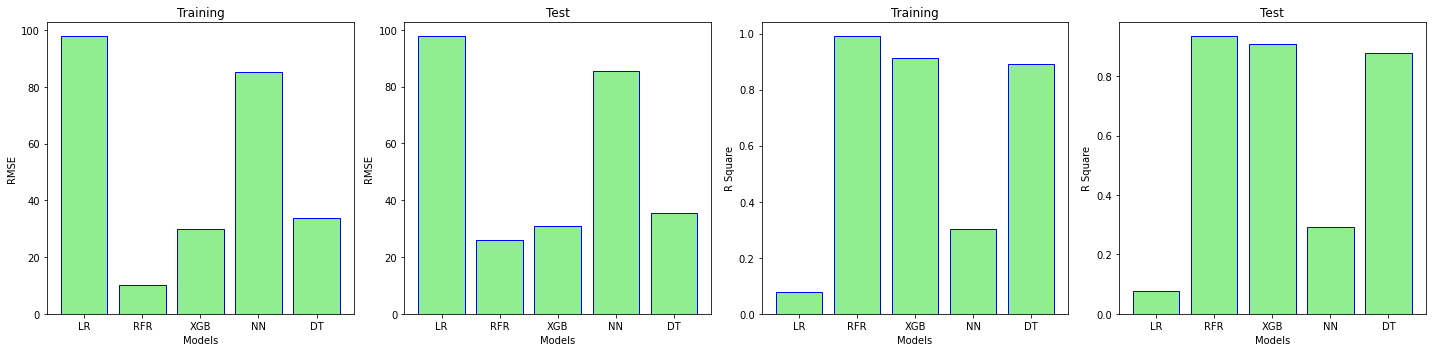

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (20,5)) # 1st width, 2nd height

ax1.bar(names,rmseTrain, color= 'lightgreen', edgecolor = 'b')
ax1.set_title('Training')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')

ax2.bar(names,rmseTest, color= 'lightgreen', edgecolor = 'b')
ax2.set_title('Test')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')

ax3.bar(names,r2Train, color= 'lightgreen', edgecolor = 'b')
ax3.set_title('Training')
ax3.set_xlabel('Models')
ax3.set_ylabel('R Square')

ax4.bar(names,r2Test, color= 'lightgreen', edgecolor = 'b')
ax4.set_title('Test')
ax4.set_xlabel('Models')
ax4.set_ylabel('R Square')

fig.tight_layout()

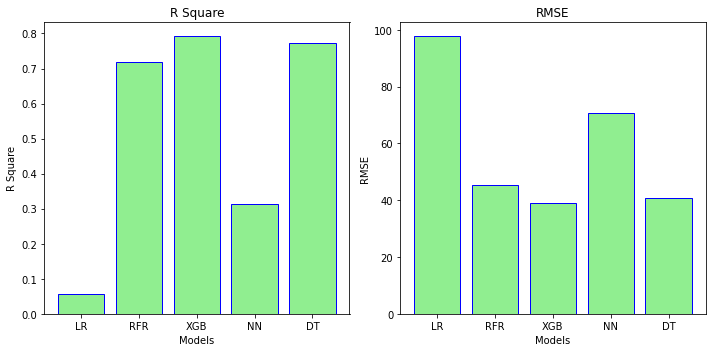

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10,5)) # 1st width, 2nd height

ax1.bar(names,r219, color= 'lightgreen', edgecolor = 'b')
ax1.set_title('R Square')
ax1.set_xlabel('Models')
ax1.set_ylabel('R Square')

ax2.bar(names,rmse19, color= 'lightgreen', edgecolor = 'b')
ax2.set_title('RMSE')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')

fig.tight_layout()

## Iteration 3 (Day = *6*)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

day = 6

ml_df_o = pd.read_csv("/content/drive/MyDrive/MachinLearning/2018_fulldata_with-weather_cleaned.csv")
ml_df = ml_df_o[ml_df_o['weekday'] == day]

X = ml_df.drop('count', axis=1)
y = ml_df['count']

#split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

df_19_o = pd.read_csv('/content/drive/MyDrive/MachinLearning/2019_cleaned_ww_0.csv')
df_19 = df_19_o[df_19_o['weekday'] == day]

test_19 = df_19.sample(frac=0.2)
X_test_19 = test_19.drop('count', axis=1)
y_test_19 = test_19['count']

rmseTest = []
rmseTrain = []

r2Test = []
r2Train = []

r219 = []
rmse19 = []

names = []

In [ ]:
ml_df

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
6638,79,6,1,1,0.0,-24,0.0,516
10145,116,6,1,4,0.0,-24,0.0,6
15396,162,6,1,2,0.0,-24,0.0,73
15655,163,6,1,1,0.0,-24,0.0,97
16663,170,6,1,3,0.0,-24,0.0,118
...,...,...,...,...,...,...,...,...
1729195,265,6,9,47,0.0,18,0.0,3
1731913,79,6,9,1,0.0,20,0.0,1
1734167,142,6,9,1,0.0,20,0.0,1
1734602,148,6,9,1,0.0,20,0.0,1


In [ ]:
df_19

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
23,1,6,1,15,0.0,1,0.0,1
24,1,6,1,28,0.0,4,0.0,1
25,1,6,1,31,0.0,5,0.0,1
41,3,6,1,11,0.0,0,0.0,1
42,3,6,1,16,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...
1761056,265,6,9,38,0.0,26,0.0,2
1761057,265,6,9,40,0.0,26,0.0,1
1761058,265,6,9,44,0.0,24,0.0,1
1761059,265,6,9,46,0.0,23,0.0,2


#### 1. Linear Regression


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
lr_reg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(lr_reg,parameters, cv=None)

grid.fit(X_train, y_train)

print(grid.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


##### Prediction on training data

In [ ]:
lr = LinearRegression(fit_intercept= True,copy_X = True, normalize = True )

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)

mse_lr_train = mean_squared_error(y_train, y_pred_train)
print('RMSE on training data:', np.sqrt(mse_lr_train))

r2_train = r2_score(y_train, y_pred_train)
print("R squared for Linear Regression on training data is: ", r2_train)

print('Coefficient of determination: %.4f on training data'% r2_score(y_train, y_pred_train))

RMSE on training data: 79.70589355902428
R squared for Linear Regression on training data is:  0.029454059494878893
Coefficient of determination: 0.0295 on training data


##### Prediction on test data

In [ ]:
y_pred_test = lr.predict(X_test)

mse_lr_test = mean_squared_error(y_test, y_pred_test)
print('RMSE on test data:', np.sqrt(mse_lr_test))

r2_test = r2_score(y_test, y_pred_test)
print("R squared for Linear Regression on test data is: ", r2_test)

print('Coefficient of determination: %.4f on test data'% r2_score(y_test, y_pred_test))

RMSE on test data: 79.27030950919308
R squared for Linear Regression on test data is:  0.03250360520084239
Coefficient of determination: 0.0325 on test data


##### Prediction on 2019 data

In [ ]:
y_pred_19 = lr.predict(X_test_19)

In [ ]:
mse_lr_test_19 = mean_squared_error(y_test_19, y_pred_19)
print('RMSE on test data:', np.sqrt(mse_lr_test))

r2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared for Linear Regression on test data is: ", r2_test)

print('Coefficient of determination: %.4f on test data'% r2_score(y_test_19, y_pred_19))

RMSE on test data: 79.27030950919308
R squared for Linear Regression on test data is:  0.03250360520084239
Coefficient of determination: -0.1199 on test data


In [ ]:
rmseTrain.append(np.sqrt(mse_lr_train))
rmseTest.append(np.sqrt(mse_lr_test))

r2Test.append(r2_test)
r2Train.append(r2_train)

r219.append(r2_test_19)
rmse19.append(np.sqrt(mse_lr_test))

names.append('LR')

### 1. Random Forest regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
import random

In [ ]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

# Try different numbers of n_estimators - this will take a minute or so
estimators = [50, 75, 100]
scores = []
scoresOfEstimation = []

for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    scoresOfEstimation.append(n)

No handles with labels found to put in legend.


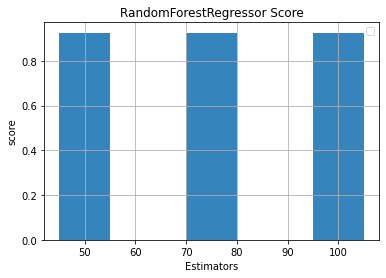

In [ ]:
plt.bar(scoresOfEstimation,scores,10,alpha=.9)
plt.ylabel('score')
plt.xlabel('Estimators')
plt.title('RandomForestRegressor Score')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0) 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

##### Prediction on training data

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("RMSE for Random forest regression on training data is: ", rmse_train)

RMSE for Random forest regression on training data is:  8.395591772358967


In [ ]:
r2_train = r2_score(y_train, y_pred_train)
print("R squared for Random forest regression on training data is: ", r2_train)

R squared for Random forest regression on training data is:  0.9892319303952162


##### Prediction on test data

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print("RMSE for Random forest regression on test data is: ", rmse_test)

RMSE for Random forest regression on test data is:  22.063671830176546


In [ ]:
r2_test = r2_score(y_test, y_pred)
print("R squared for Random forest regression on test data is: ", r2_test)

R squared for Random forest regression on test data is:  0.9250478964110227


##### Prediction on 2019 data

In [ ]:
y_pred_19 = regressor.predict(X_test_19)

In [ ]:
mse_test = mean_squared_error(y_test_19, y_pred_19)
rmse_test_19 = np.sqrt(mse_test)
print("RMSE for Random forest regression on 2019 data is: ", rmse_test_19)

RMSE for Random forest regression on 2019 data is:  37.64811261700314


In [ ]:
r2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared for Random forest regression on 2019 data is: ", r2_test_19)

R squared for Random forest regression on 2019 data is:  0.69866450968236


In [ ]:
rmseTrain.append(rmse_train)
rmseTest.append(rmse_test)

r2Train.append(r2_train)
r2Test.append(r2_test)


r219.append(r2_test_19)
rmse19.append(rmse_test_19)

names.append('RFR')

### 2. XGBoost regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  7.7min finished


0.895342064429437
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
XGBModel = XGBRegressor(colsample_bytree=0.7, learning_rate = 0.07, max_depth = 7, 
                        min_child_weight = 4, n_estimators = 500, nthread = 4,
                        objective ='reg:linear', silent = 1, subsample = 0.7)
XGBModel.fit(X_train,y_train , verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

##### Prediction on training data

In [ ]:
XGBpredict_train = XGBModel.predict(X_train)
MAE = mean_absolute_error(y_train , XGBpredict_train)
print('XGBoost training MAE = ',MAE)

XGBoost training MAE =  12.808506381148916


In [ ]:
XGBmse_train = mean_squared_error(y_train, XGBpredict_train)
XGBrmse_train = np.sqrt(XGBmse_train)
print("Root-mean-squared-error for XGB regression on training data is: ", XGBrmse_train)

Root-mean-squared-error for XGB regression on training data is:  25.075323974978303


In [ ]:
XGBr2_train = r2_score(y_train, XGBpredict_train)
print("R squared for XGB regression on training data is: ", XGBr2_train)

R squared for XGB regression on training data is:  0.9039431516286828


##### Prediction on test data

In [ ]:
XGBpredict_test = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredict_test)
print('XGBoost test MAE = ',MAE)

XGBoost test MAE =  13.07166099322468


In [ ]:
XGBmse_test = mean_squared_error(y_test, XGBpredict_test)
XGBrmse_test = np.sqrt(XGBmse_test)
print("Root-mean-squared-error for XGB regression on test data is: ", XGBrmse_test)

Root-mean-squared-error for XGB regression on test data is:  25.874144487856636


In [ ]:
XGBr2_test = r2_score(y_test, XGBpredict_test)
print("R squared for  XGB regression on test data is: ", XGBr2_test)

R squared for  XGB regression on test data is:  0.8969233618300344


##### Prediction on 2019 data

In [ ]:
y_pred_19 = XGBModel.predict(X_test_19)

In [ ]:
mse_test_19 = mean_squared_error(y_test_19, y_pred_19)
rmse_test_19 = np.sqrt(mse_test_19)
print("RMSE for XGB regression on 2019 data is: ", rmse_test_19)

RMSE for XGB regression on 2019 data is:  32.61861341142737


In [ ]:
r2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared for XGB regression on test data is: ", r2_test_19)

R squared for XGB regression on test data is:  0.7737988243197699


In [ ]:
rmseTrain.append(XGBrmse_train)
rmseTest.append(XGBrmse_test)

r2Train.append(XGBr2_train)
r2Test.append(XGBr2_test)


r219.append(r2_test_19)
rmse19.append(rmse_test_19)

names.append('XGB')

### 3. Neural network regression

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/30
5168/5187 [============================>.] - ETA: 0s - loss: 45.5057 - mean_absolute_error: 45.5057
Epoch 00001: val_loss improved from inf to 45.33700, saving model to Weights-001--45.33700.hdf5
5187/5187 [==============================] - 14s 3ms/step - loss: 45.5315 - mean_absolute_error: 45.5315 - val_loss: 45.3370 - val_mean_absolute_error: 45.3370
Epoch 2/30
5184/5187 [============================>.] - ETA: 0s - loss: 45.3271 - mean_absolute_error: 45.3271
Epoch 00002: val_loss did not improve from 45.33700
5187/5187 [==============================] - 14s 3ms/step - loss: 45.3250 - mean_absolute_error: 45.3250 - val_loss: 45.3404 - val_mean_absolute_error: 45.3404
Epoch 3/30
5174/5187 [============================>.] - ETA: 0s - loss: 45.1566 - mean_absolute_error: 45.1566
Epoch 00003: val_loss improved from 45.33700 to 44.88546, saving model to Weights-003--44.88546.hdf5
5187/5187 [==============================] - 14s 3ms/step - loss: 45.1467 - mean_absolute_error: 4

In [ ]:
# Load weights file of the best model :
wights_file = 'Weights-029--34.43082.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

##### Prediction on training *data*

In [ ]:
NNpredict_train = NN_model.predict(X_train)

In [ ]:
NN_train_MAE = mean_absolute_error(y_train , NNpredict_train)
print('Test MAE = ',NN_train_MAE)

Test MAE =  34.51338737458228


In [ ]:
NNmse_train = mean_squared_error(y_train , NNpredict_train)
NNrmse_train = np.sqrt(NNmse_train)
print("RMSE on train data: ", NNrmse_train)

RMSE on train data:  71.73726686893401


In [ ]:
NN_r2_train = r2_score(y_train , NNpredict_train)
print("R squared on train data: ", NN_r2_train)

R squared on train data:  0.2138147701659905


##### Prediction on test *data*

In [ ]:
NNpredict_test = NN_model.predict(X_test)

In [ ]:
NN_MAE = mean_absolute_error(y_test , NNpredict_test)
print('Test MAE = ',NN_MAE)

Test MAE =  34.04965928485294


In [ ]:
NNmse_test = mean_squared_error(y_test, NNpredict_test)
NNrmse_test = np.sqrt(NNmse_test)
print("RMSE on test data: ", NNrmse_test)

RMSE on test data:  70.53074599785715


In [ ]:
NN_r2_test = r2_score(y_test, NNpredict_test)
print("R squared on test data: ", NN_r2_test)

R squared on test data:  0.2340768392992536


##### Prediction on 2019 data

In [ ]:
NNpredict_test_19 = NN_model.predict(X_test_19)

In [ ]:
NN_MAE_19 = mean_absolute_error(y_test_19 , NNpredict_test_19)
print('Test MAE = ',NN_MAE_19)

Test MAE =  28.399517659962726


In [ ]:
NNmse_test_19 = mean_squared_error(y_test_19 , NNpredict_test_19)
NNrmse_test_19 = np.sqrt(NNmse_test_19)
print("RMSE on 2019 data: ", NNrmse_test_19)

RMSE on 2019 data:  59.911454248270424


In [ ]:
NN_r2_test_19 = r2_score(y_test_19 , NNpredict_test_19)
print("R squared on test data: ", NN_r2_test_19)

R squared on test data:  0.23689624682590804


In [ ]:
rmseTrain.append(NNrmse_train)
rmseTest.append(NNrmse_test)

r2Train.append(NN_r2_train)
r2Test.append(NN_r2_test)


r219.append(NN_r2_test_19)
rmse19.append(NNrmse_test_19)

names.append('NN')

### 4. Decision Tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtm = DecisionTreeRegressor()

param_grid = {"criterion": ["mse", "mae"],
              "max_depth": [3, 9, 13],
              "min_samples_leaf": [10, 30, 50],
              "max_leaf_nodes": [10, 20, 30],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

NameError: ignored

In [ ]:
regressor = DecisionTreeRegressor(max_depth=13, random_state=1, min_samples_leaf=10)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

###### Prediction on *training data*

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
MAE_train = mean_absolute_error(y_train , y_pred_train)
print('Mean absolute error for training data = ', MAE_train)

DTmse_train = mean_squared_error(y_train, y_pred_train)
DTrmse_train = np.sqrt(DTmse_train)
print("RMSE for training data is: ", DTrmse_train)

DTr2_train = r2_score(y_train, y_pred_train)
print("R squared on training data is: ", DTr2_train)

Mean absolute error for training data =  12.65252781204956
RMSE for training data is:  28.348632266620154
R squared on training data is:  0.87722796673609


###### Prediction on *test data*

In [ ]:
y_pred_test = regressor.predict(X_test)

In [ ]:
MAE_test = mean_absolute_error(y_test , y_pred_test)
print('Mean absolute error for test data = ', MAE_test)

DTmse_test = mean_squared_error(y_test, y_pred_test)
DTrmse_test = np.sqrt(DTmse_test)
print("RMSE for test data is: ", DTrmse_test)

DTr2_test = r2_score(y_test, y_pred_test)
print("R squared on test data is: ", DTr2_test)

Mean absolute error for test data =  13.172831246505721
RMSE for test data is:  29.77185528884624
R squared on test data is:  0.8635291029318259


###### Prediction on *2019 data*

In [ ]:
y_pred_19 = regressor.predict(X_test_19)

In [ ]:
MAE_19 = mean_absolute_error(y_test_19 , y_pred_19)
print('Mean absolute error for 2019 data = ', MAE_19)

DTmse_test_19 = mean_squared_error(y_test_19, y_pred_19)
DTrmse_test_19 = np.sqrt(DTmse_test_19)
print("RMSE for 2019 data is: ", DTrmse_test_19)

DTr2_test_19 = r2_score(y_test_19, y_pred_19)
print("R squared on 2019 data is: ", DTr2_test_19)

Mean absolute error for 2019 data =  16.567622999902923
RMSE for 2019 data is:  34.21028908298589
R squared on 2019 data is:  0.7511845438695892


In [ ]:
rmseTrain.append(DTrmse_train)
rmseTest.append(DTrmse_test)

r2Train.append(DTr2_train)
r2Test.append(DTr2_test)

r219.append(DTr2_test_19)
rmse19.append(DTrmse_test_19)

names.append('DT')

### Compare Models

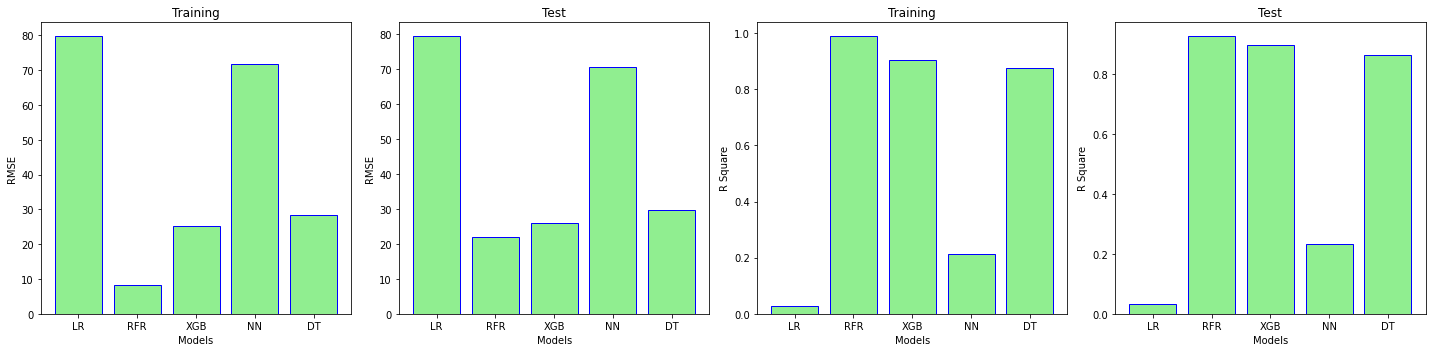

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (20,5)) # 1st width, 2nd height

ax1.bar(names,rmseTrain, color= 'lightgreen', edgecolor = 'b')
ax1.set_title('Training')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')

ax2.bar(names,rmseTest, color= 'lightgreen', edgecolor = 'b')
ax2.set_title('Test')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')

ax3.bar(names,r2Train, color= 'lightgreen', edgecolor = 'b')
ax3.set_title('Training')
ax3.set_xlabel('Models')
ax3.set_ylabel('R Square')

ax4.bar(names,r2Test, color= 'lightgreen', edgecolor = 'b')
ax4.set_title('Test')
ax4.set_xlabel('Models')
ax4.set_ylabel('R Square')

fig.tight_layout()

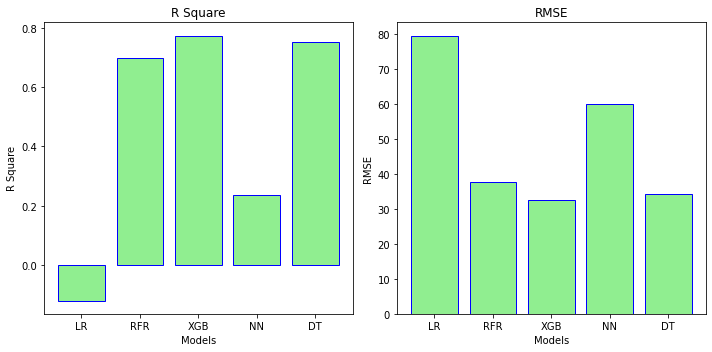

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10,5)) # 1st width, 2nd height

ax1.bar(names,r219, color= 'lightgreen', edgecolor = 'b')
ax1.set_title('R Square')
ax1.set_xlabel('Models')
ax1.set_ylabel('R Square')

ax2.bar(names,rmse19, color= 'lightgreen', edgecolor = 'b')
ax2.set_title('RMSE')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')

fig.tight_layout()

# *Final Model*

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

ml_df = pd.read_csv("/content/drive/MyDrive/MachinLearning/2018_fulldata_with-weather_cleaned.csv")

X = ml_df.drop('count', axis=1)
y = ml_df['count']

#split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

df_19 = pd.read_csv('/content/drive/MyDrive/MachinLearning/2019_cleaned_ww_0.csv')

test_19 = df_19.sample(frac=0.2)
X_test_19 = test_19.drop('count', axis=1)
y_test_19 = test_19['count']

In [7]:
rf = RandomForestRegressor()

param_grid = [ {'n_estimators': [30, 50], 'max_features': [3, 8], 
              'max_depth': [10, 50, None], 'bootstrap': [True, False]}
              ]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [8]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66.23339209879299 {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 30}
67.18984602829268 {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 50}
nan {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 30}
nan {'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
29.651223172207814 {'bootstrap': True, 'max_depth': 50, 'max_features': 3, 'n_estimators': 30}
29.29028243133367 {'bootstrap': True, 'max_depth': 50, 'max_features': 3, 'n_estimators': 50}
nan {'bootstrap': True, 'max_depth': 50, 'max_features': 8, 'n_estimators': 30}
nan {'bootstrap': True, 'max_depth': 50, 'max_features': 8, 'n_estimators': 50}
29.89130373236676 {'bootstrap': True, 'max_depth': None, 'max_features': 3, 'n_estimators': 30}
29.245262759908048 {'bootstrap': True, 'max_depth': None, 'max_features': 3, 'n_estimators': 50}
nan {'bootstrap': True, 'max_depth': None, 'max_features': 8, 'n_estimators': 30}
nan {'bootstrap': True, 'max

In [9]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
rf = RandomForestRegressor(n_estimators=50, max_features=3, bootstrap=True, max_depth=50)

In [17]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

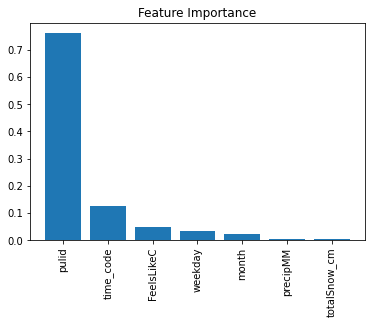

In [27]:
 # get importance
importances = rf.feature_importances_
# summarize feature importance

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

In [28]:
for feat, importance in zip(X_train.columns, importances):
    print ('Feature: {f}, importance: {i}'.format( f=feat, i=importance))

Feature: pulid, importance: 0.761563211462502
Feature: weekday, importance: 0.032760778484097114
Feature: month, importance: 0.023059113237935133
Feature: time_code, importance: 0.1258160073066327
Feature: totalSnow_cm, importance: 0.002784421875923793
Feature: FeelsLikeC, importance: 0.04922859399791999
Feature: precipMM, importance: 0.004787873634989304


In [36]:
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test_19 = np.sqrt(mse_test)
print("RMSE is: ", rmse_test_19)

r2_test_19 = r2_score(y_test, y_pred_test)
print("R squared is: ", r2_test_19)

RMSE is:  28.663280659677696
R squared is:  0.9091910655414689


In [37]:
y_pred_test_19 = rf.predict(X_test_19)

In [38]:
mse_test = mean_squared_error(y_test_19, y_pred_test_19)
rmse_test_19 = np.sqrt(mse_test)
print("RMSE is: ", rmse_test_19)

r2_test_19 = r2_score(y_test_19, y_pred_test_19)
print("R squared is: ", r2_test_19)

RMSE is:  37.74880987575988
R squared is:  0.7758228193621772
